# 信息瀑布实验
探索最优策略
## 实验介绍
信息瀑布实验是经典的行为金融学实验。
### 实验背景设定
每组六个人。对每组来说，有两个杯子，一个红色杯子，一个蓝色杯子。其中，红色杯子里装有两个红球一个蓝球。蓝色杯子里装有两个蓝球一个红球。
### 实验流程
实验分为六轮。每一轮当中，计算机会随机挑选一种颜色的杯子。被试者不知道计算机选择的杯子是哪一个。

计算机然后会给每个人发一个从该杯子里取出的球（每发完一个又放回去）。

每组六个人有先后次序，来猜测计算机挑选的杯子颜色。第一个决策者只能从球的颜色来判断杯子的颜色。而第二个就可以通过第一个人的决策加上自己的球的颜色来决策，以此类推，排在后面的人便可以依照前面的人的选择结果来判断杯子的颜色。每一轮结束，杯子的真实信息会公布。
## 经济理论
主要有羊群行为和信息层叠模型。
### 羊群行为
羊群行为体现在信息瀑布实验和银行挤兑实验当中。羊群行为也就是“从众行为”，是指行为上的模仿和一致性。该词源于生物学对动物聚群特征的研究。\par
引申到人类社会，便表现为采用同样的思维活动，进行类似的行为，心理上依赖于和大多数人一样思考、感觉、行动，以减少采取行动的成本，获得尽可能大的收益。延伸到金融市场，借用生物学上羊群的群聚行为的概念，指代投资者在信息不确定的情况下，行为受到其他投资者的影响，模仿他人决策，或者过多依赖于舆论，而不考虑私人信息的行为。
### 信息层叠模型
信息层叠模型认为，一种投资策略会随着时间的流动而变动，如果先行者根据其私人信息采取了行动，后继者就会根据他们的行动来推测信息，借以修正自己的先验信息。如果后继者在修正过程中完全忽视先验信息或者给予先验信息过小的权重，就容易产生模仿先行者的行为。后继者赋予先验信息的权重大小取决于他对先验信息准确度的信心。
信息瀑布中，人们的预期是用贝叶斯规则得到的。贝叶斯规则是指人们根据新的信息从先验概率得到后验概率的方法。

## 代码流程
我们需要找出最优策略，所以写下模拟实验的代码，来检验每一种策略的正确率是多少，从而指导我们判断出群体最理性的行为，使得猜对的概率尽可能大。

### 引入库
我们需要`numpy`来加速随机数的生成以及列表的处理。


使用`pandas`来以列表的形式记录实验结果。


使用`matplotlib`来可视化结果。

如果没有的话请使用`pip install package_name`来安装。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import fractions
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### 定义类
采用面向对象的程序设计思想，来尽可能降低代码的阅读难度。基于同样的目的，对于类的内部变量也没有封装。
#### 球
我们只需要定义一个内部变量颜色。

In [2]:
class Ball:
    def __init__(self, color):
        self.color = color

#### 杯子
我们需要根据杯子的颜色来建立杯子，还要定义里面装了三个球，球的颜色按照实验的要求。


除了构造函数以外，定义了一个`pick()`函数，表示从杯子里随机抽一个球。返回的结果是字符串，表示颜色。

In [3]:
class Cup:
    def __init__(self, color):
        self.color = color
        if color == 'Red':
            self.balls = np.array([Ball('Red'), Ball('Red'), Ball('Blue')])
        else:
            self.balls = np.array([Ball('Red'), Ball('Blue'), Ball('Blue')])

    def pick(self):
        return self.balls[np.random.randint(0, 3)].color

#### 杯子集合
总共有两个杯子，一红一蓝。杯子集合就是这么定义了。

还有一个函数`random_pick()`表示随机抽选一个杯子。返回的对象是`Cup`。

其实也可以不要这个类，直接写在`test`函数中也可，看哪种方便你理解了。

In [4]:
class Cups:
    def __init__(self):
        self.Cups = np.array([Cup('Red'), Cup('Blue')])

    def random_pick(self):
        return self.Cups[np.random.randint(0, 2)]

#### 人
人的构造函数要指定一个`order`，即这个实验中给定的次序。因为不同的次序所作出的决策是不同的。

人的内部变量有次序，有抽到的球的颜色，有选择的颜色，还有选择的是否正确(和杯子颜色相同)。

**其中要值得关注的是`decide(info)`函数**。这表示了你所定义了的人的策略行为。它需要一个`info`，表示前人的选择结果。你可以随意改变其中的策略，来观察结果。`method`代表第几个方法。我预置了三种方法，第一种是优先考虑个人最优的方法（即个人的正确率最大），第二种是优先考虑群体最优的方法。
第三种用于个人最优的对照。

TODO: 如果时间允许的话，我会尝试使用一个利用感知器的简单的神经网络来自动化得出最优解。（咕咕咕警告）

In [5]:
class Person:
    def __init__(self, order, Cup):
        self.order = order
        self.choice = None
        self.right = False
        self.cupcolor = Cup.color
        self.picked = Cup.pick()

    # TODO：feel free to add methods
    def decide(self, info, method):
        if method == 1:  # 优先考虑个人最优的情况
            # 前两人选择自己抽到的颜色
            if self.order == 1 or self.order == 2:
                self.choice = self.picked
            # 后人根据前两人来选择自己的颜色
            else:
                if info[self.order-2] == info[self.order-3]:
                    self.choice = info[self.order -2]
                else:
                    self.choice = self.picked
        if method == 2:  # 优先考虑最后一人最优的情况
            if self.order != 6:
                self.choice = self.picked
            else:
                info.append(self.picked)
                if info.count('Red') > info.count('Blue'):
                    self.choice = 'Red'
                else:
                    self.choice = 'Blue'
        if method == 3:  # 作为一的对照组
            # 前三人选择自己抽到的颜色
            if self.order <= 3:
                self.choice = self.picked
            # 后人根据前三人来选择自己的颜色，完全不看自己的颜色
            else:
                info_temp = info[-3]
                if info_temp.count('Red') > info_temp.count('Blue'):
                    self.choice = 'Red'
                else:
                    self.choice = 'Blue'
        if method == 4: # 前两人按照自己的选，后面人根据前面的人选，如果前面的总人数五五开，按照自己的选，否则按照前面的人选。
            if self.order == 1 or self.order == 2:
                self.choice = self.picked
            else:
                if info.count('Red') > info.count('Blue'):
                    self.choice = 'Red'
                if info.count('Red') < info.count('Blue'):
                    self.choice = 'Blue'
                else:
                    self.choice = self.picked
      # if method == 5 :
            # it's your'turn now!
        
    def strategy(self, info, method):
        self.decide(info, method)
        if self.choice == self.cupcolor:
            self.right = True

### 策略分析
仔细思考我所给出`method==1`的策略。


1. 当我所在的位置是第一个人的时候，我会选择自己抽到的颜色。显然，我的正确率有`2/3`。

2. 当我所在的位置是第二个人的时候，我还是会选择自己抽到的颜色。因为如果我和前人颜色相同必选前人，答对的概率为`4/5`。而不同的时候，我选哪种颜色的概率都是`1/2`。为了告诉下一个人我和前人颜色不同，所以坚守自己的颜色可以更偏向群体最优。

3. 当我所在的位置是第三个人的时候，如果前两人颜色相同，我会跟从他们的选择。如果两人颜色不同，我会坚定自己的选择。为什么是这样的结果？这是我经过概率论的推导得出的。不会算？没关系，这就是写这篇`Notebook`的目的。你大可以根据你所认为的最优解调整策略，并观察结果。

4. 当我所在的位置是第四个人的时候，如果前两人颜色相同（即第三个人也相同），我会选择相同的颜色。如果两人颜色不同，我会选择自己的颜色。

5. 当我所在的位置是第五人的时候，如果三四两人颜色相同，跟从他们的选择。如果三四两人颜色也不同，坚守自己的选择。

6. 当我所在的位置是第六人的时候，如果四五人颜色相同，跟从他们的选择。如果四五人颜色不同，坚守自己的选择。

总的说来，就是前两人选自己的颜色，后面的人根据前两人是否相同而选择是否跟从他们。注意，必须人人按照这个规则，才可能得到最优群体解（最后一个人概率最大）。如果中间有一人打破，那么下一个人的最优解会发生变化。这经过了复杂而严密的推导——因为到后期所发生的分支实在是太多了。

是不是越往后越绕，越乱？是时候更改代码验证你自己的策略啦！

`method==2`时候的策略是前面五个人都遵照自己的意思，第六个人来判断，很明显是一种对最后一人最优的情况。

`method==3`时候的策略是对于第一种策略的怀疑，可能你会觉得要前三个人都相同我才能更好地符合个人理性。是这样吗？我们实验来证明。

你可能会怀疑，因为第四人或第三人的策略已经将前人的全部策略考虑进去了，所以我们更关注接近次序后面的人的选择。

`method==4`时候的策略前两人按照自己的选，后面人根据前面的人选，如果前面的总人数五五开，按照自己的选，否则按照前面的人选。


我知道你可能仍然在怀疑，而它已经列入`method==5` 里了。

## 单次Test 
`Test`类代表一次实验，需要传递杯子集合，然后抽取一个杯子。接着，自身创建一个人群，人群包含6个人。最后还需要一个信息集。信息集记录前面人的选择。
`Test`的核心函数是`test()`，每一个人根据策略选择，然后添加进`info`当中。`test_result()`返回了选择的结果，是一个`dataframe`类型。最后一个`print_result()`函数只是单纯为了检验`Test`类写得是否正确，是可以被删去的。

In [6]:
class Test:
    def __init__(self, Cups):
        self.cup = Cups.random_pick()
        People = []
        for i in range(1, 7):
            People.append(Person(i, self.cup))
        self.People = np.array(People)
        self.info = []
        
    def test(self,method):
        for i in range(0, 6):
            self.People[i].strategy(self.info,method)
            self.info.append(self.People[i].choice)

    def test_result(self,rounds,method):
        self.test(method)
        data = pd.DataFrame([[rounds, 1, self.People[0].picked, self.People[0].choice, self.People[0].right]])
        for i in range(1, 6):
            choice = pd.DataFrame([[rounds, i + 1, self.People[i].picked, self.People[i].choice, self.People[i].right]])
            data = data.append(choice)
        return data
    
    def print_result(self):
        print("Cup Color " + self.cup.color)
        print("Person id " + "  pick " + " claim " + " correct? ")
        for i in range(0, 6):
            print("     " + str(i) + "      " + self.People[i].picked + "   " + self.People[i].choice +  "   " + str(self.People[i].right))

### 检验代码是否正确
先检验一次实验的结果。下面代码可以反复运行，看看实际结果是否符合我们要求的结果。这里使用的是Medthod 1。

In [7]:
cups = Cups()
test = Test(cups)
test.test(1)
test.print_result()

Cup Color Blue
Person id   pick  claim  correct? 
     0      Blue   Blue   True
     1      Blue   Blue   True
     2      Blue   Blue   True
     3      Red   Blue   True
     4      Blue   Blue   True
     5      Blue   Blue   True


### Bingo!
接下来需要反复测试并统计结果。我们定义一个`Multi_test`类。

In [8]:
class Multi_test:
    def __init__(self, num, method):
        self.cups = Cups()
        self.data = pd.DataFrame(Test(self.cups).test_result(1,method))
        for i in range(1, num):
            self.data = self.data.append(Test(self.cups).test_result(i+1,method))
        self.data.columns=['round', 'order', 'picked', 'choice', 'right']

    def result(self):
        return self.data

### 检验代码是否正确
先检验一次实验的结果。反复测试输出的结果是否符合预期，这里简单重复100次实验，使用方法一。

In [9]:
test = Multi_test(100,1).result()
test.head(12)

,round,order,picked,choice,right
0,1,1,Red,Red,True
0,1,2,Red,Red,True
0,1,3,Red,Red,True
0,1,4,Red,Red,True
0,1,5,Red,Red,True
0,1,6,Red,Red,True
0,2,1,Red,Red,True
0,2,2,Blue,Blue,False
0,2,3,Blue,Blue,False
0,2,4,Red,Blue,False


## Bingo!

定义Medthod_Test,我们希望给定epoch和method，自动绘制出结果和显示比例。

我们需要什么样的统计结果呢？

我们需要看六个次序的不同的人，他们判断正确的人有多少。

In [10]:
class Method_Test:
    def __init__(self, method, epoch):
        Test = Multi_test(epoch, method).result()
        self.grouped = Test[Test['right'] == True].drop(['round', 'picked', 'choice'], axis=1).groupby('order').count()      
        self.epoch = epoch
        self.whole_right = len(Test[Test['right'] == True])
        
    def plot(self):
        self.grouped.plot(kind='bar', ylim=(0, self.epoch), figsize=(13, 6))

    def ratio(self):
        self.grouped['right'] = self.grouped['right'] / self.epoch
        return self.grouped
        
    def ratio_whole(self):
        print(self.whole_right/epoch/6)

##### 定义测试轮数
我们测试50000轮。使用`head()`函数来检查是否运行正确。50000这个数字可以随意更改。越大越精确，同时运行速度越慢。

In [11]:
epoch = 50000

### 方法一：

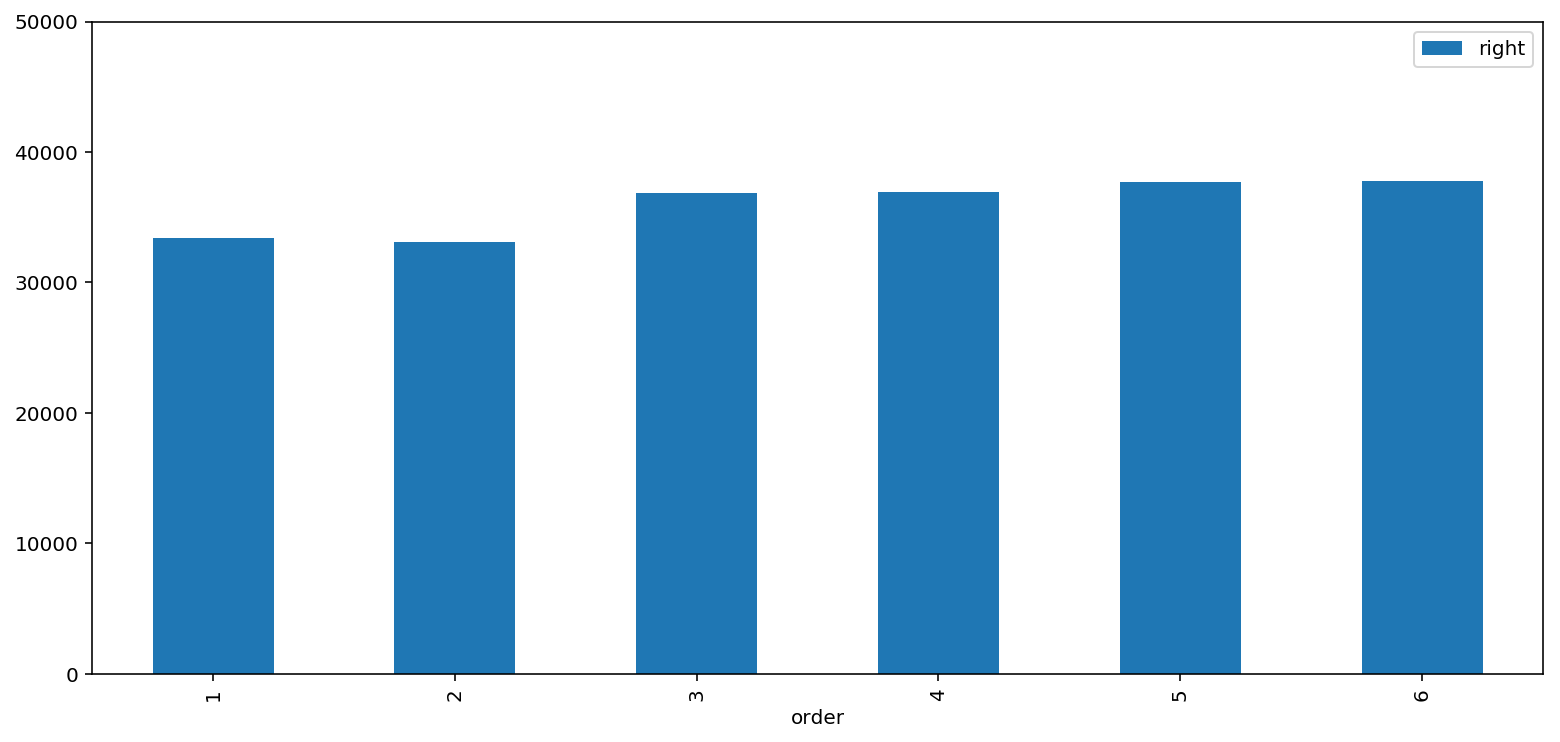

In [12]:
test_1 = Method_Test(1,epoch)
test_1.plot()

我们可以看到，排在第一二次序的人正确率是非常接近`2/3`的。从第二到第三的正确率大幅增加。在第三到第六次序依次几乎不变。我们用比例进行更好地展示。

In [13]:
test_1.ratio().head(6)

,right
order,
1,0.66850
2,0.66230
3,0.73784
4,0.73862
5,0.75430
6,0.75564


In [14]:
test_1.ratio_whole()

0.7195333333333332


这是一个使得自身正确率最大的策略。其中，所有人的准确率综合是大于0.71的。

## 对照其他组
### 方法二（最后一人正确率优先）

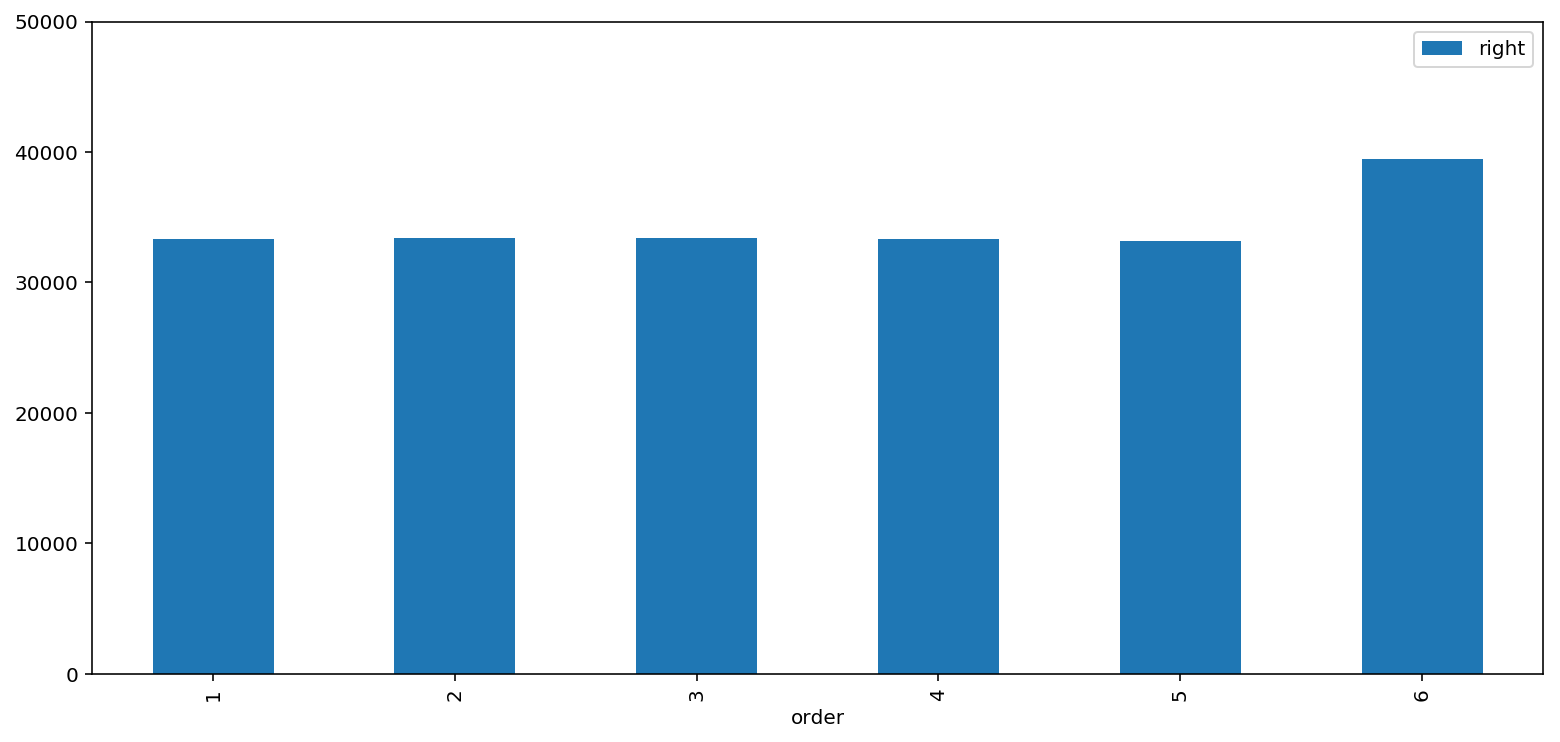

In [15]:
test_2 = Method_Test(2,epoch)
test_2.plot()

可以看到，这种策略的结果是前几位正确率在`2/3`左右，最后一位的结果大幅增加，符合我们的预期。

In [16]:
test_2.ratio().head(6)

,right
order,
1,0.66658
2,0.66892
3,0.66870
4,0.66698
5,0.66396
6,0.78950


In [17]:
test_2.ratio_whole()

0.68744


但是这种策略的综合正确率只有0.68左右。

### 方法三

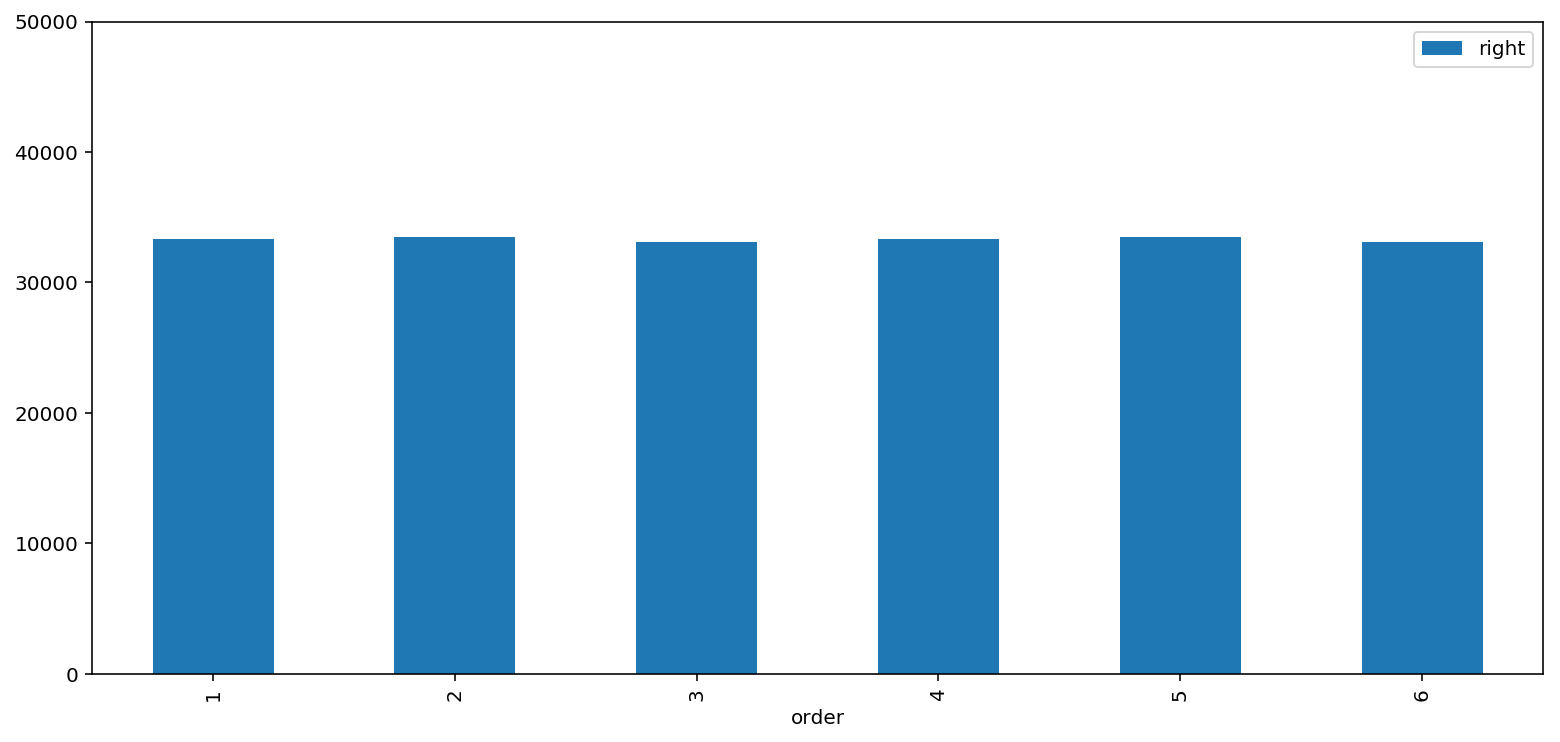

In [18]:
test_3 = Method_Test(3,epoch)
test_3.plot()

In [19]:
test_3.ratio().head(6)

,right
order,
1,0.66656
2,0.66930
3,0.66230
4,0.66656
5,0.66930
6,0.66230


In [20]:
test_3.ratio_whole()

0.6660533333333333


实验表明，这种策略看起来很美好，实际上让所有人的正确率都很低，和按照自己球颜色的一样，大家都是`2/3`的概率

### 方法四

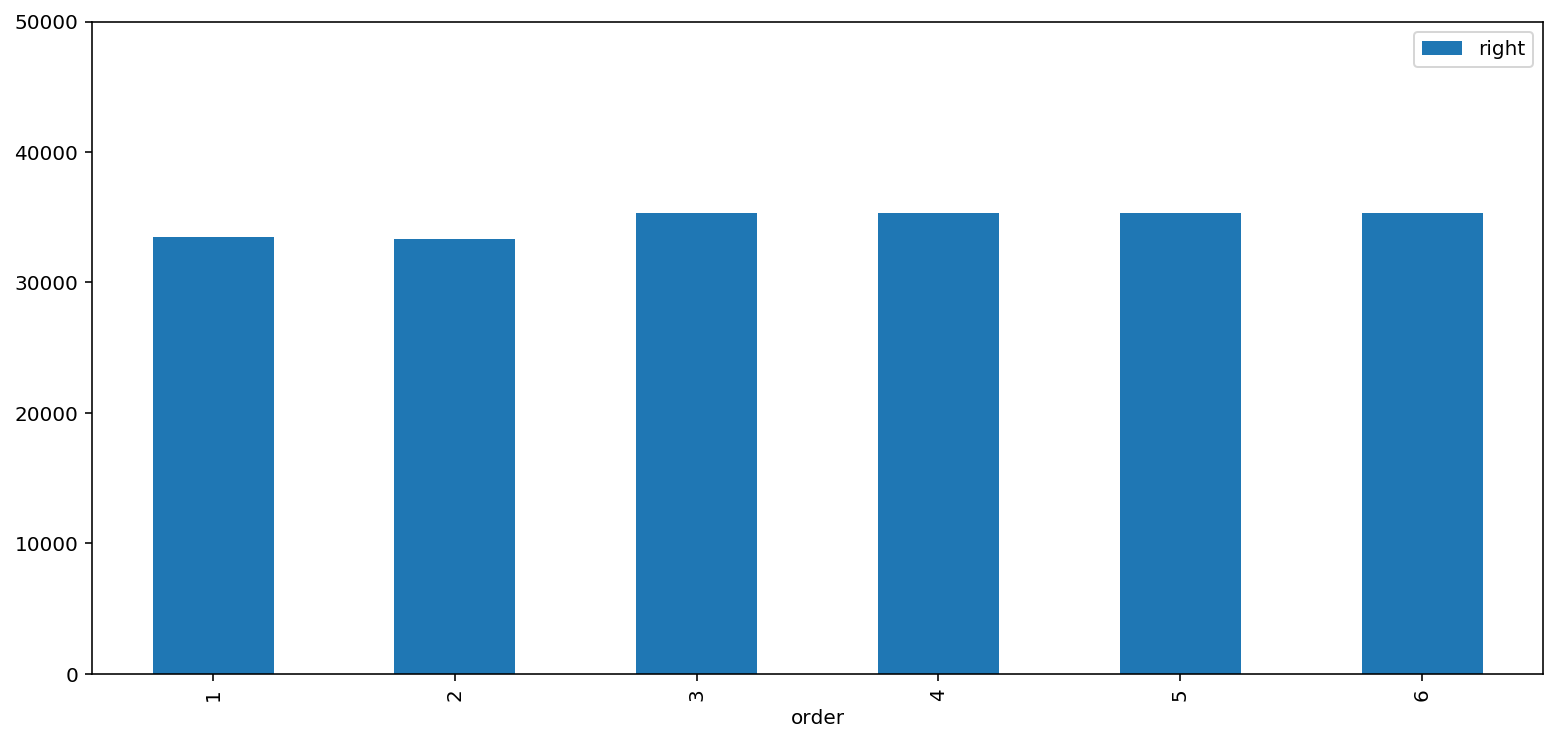

In [21]:
test_4 = Method_Test(4,epoch)
test_4.plot()

In [22]:
test_4.ratio().head(6)

,right
order,
1,0.66914
2,0.66736
3,0.70686
4,0.70660
5,0.70714
6,0.70654


In [23]:
test_4.ratio_whole()

0.69394


这个结果算是相当**令人惊愕**了。考虑了之前所有选择，被给予厚望的方法四效果仅仅比按照自己颜色选好了一点点。虽然参照以往的经验，确实是让每个人的正确率稳步提升，但是提升幅度实在是太小了。这也用实验印证了最初的策略分析内容。

## 更好的测试方法？

我们可以利用**深度学习中的感知器神经网络**来自动最优化出最优参数。

方法是这样：
1. 首先将一种颜色定义为1，另一种定义为-1
2. 先只考虑第二人的情况。
3. 我们考虑两个变量，分别是第一个人的选择和自身所抽中的球的颜色，当然都是以1,-1表示的。
4. 任意给定两个权重，譬如0.25,0.75（按照假定，应该是越往后次序抽到的颜色权重越重要，所以这样假设，当然也可以随机假设）。这两者对应前面两个变量的系数，也就是权重。将这两个权重分别与前两个变量乘起来，得到的和，就是对于颜色的预测。预测值大于0代表大于1的颜色，小于0代表小于-1的颜色。还有一个bias可以理解为截距。

$$
w_1x_1 + w_2x_2+b = prediction
$$

5. 定义一个损失函数，代表预测颜色和实际颜色不一致的错误率。
6. 不断调整权重，使得预测结果尽可能地好。


如果拿第三个人来举例，如果第一个选择了红色(1)，第二个人选择了蓝色(-1)，你自己抽到了蓝色(-1)。初始化的权重是0.25,0.25,0.5。
所以你对于颜色的结果预测是

$$
    \hat{P} = 1 \times 0.25 + -1 \times 0.25 + -1 \times 0.5 = -0.5 < 0 
$$

小于0,即认为是蓝色。

损失函数通常使用交叉熵损失函数。它不仅衡量了猜对的个数，而且要求，颜色为0的预测结果越接近0的，比预测结果在0.4左右的更好。

$$
L(\hat{y},y) = -ylog(\hat{y}) - (1-y)log(1-\hat{y})
$$

在感知器模型当中，损失函数只是简单的

$$
   L(w,b) = - \sum_{x_i \in M} y_i(w \times x_i + b)
$$

调整权重的算法这里使用简单的单层感知器。使用随机梯度下降法，找到一个预测错的点，然后

$$
w=w+y_i\times x_i \times \eta
$$
$$
b = b + y_i \times \eta
$$

$\eta$是学习率，小于1。

时间允许的话，我会尽早在另一个文档中完成这个模型。
文件位置在


https://github.com/QSCTech-Sange/Information-Cascade-in-Python/blob/master/Neural%20Network%20Version.ipynb